In [1]:
# Step 1: Read the file and split into training and testing sets
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the dataset
file_path = "C:\\Users\\Ngugi\\Downloads\\IMDB Dataset.csv"
df = pd.read_csv(file_path)

# Split the data into training (first 40000 instances) and testing sets (last 10000 instances)
train_data, test_data, train_labels, test_labels = train_test_split(
    df['review'], df['sentiment'], train_size=40000, test_size=10000, random_state=42
)

In [3]:
pip install nltk


     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 220.2 kB/s eta 0:00:07
      --------------------------------------- 0.0/1.5 MB 220.2 kB/s eta 0:00:07
      --------------------------------------- 0.0/1.5 MB 220.2 kB/s eta 0:00:07
      --------------------------------------- 0.0/1.5 MB 220.2 kB/s eta 0:00:07
     - -------------------------------------- 0.0/1.5 MB 122.9 kB/s eta 0:00:12
     - -------------------------------------- 0.1/1.5 MB 164.1 kB/s eta 0:00:09
     - ----------------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Step 2: Pre-processing the text
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# Download stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    words = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming (optional)
    # Uncomment the following three lines if you want to apply stemming
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words]
    # Join words back into a string
    text = ' '.join(words)
    return text

# Apply preprocessing to training and testing data
train_data = train_data.apply(preprocess_text)
test_data = test_data.apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ngugi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ngugi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


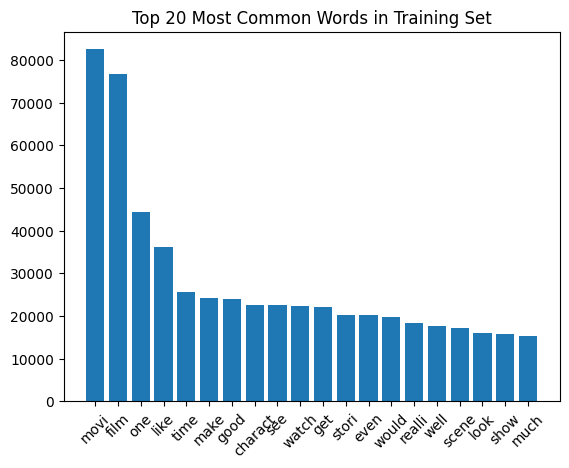

In [7]:
# Step 3: Analyze the features of the training set
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Create a bag-of-words model
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)

# Visualize the most common words
word_freq = pd.DataFrame(X_train.sum(axis=0), columns=vectorizer.get_feature_names_out())
word_freq = word_freq.T.sort_values(by=0, ascending=False).head(20)

# Plot the most common words
plt.bar(word_freq.index, word_freq[0])
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Training Set')
plt.show()


In [8]:
# Step 4: Build a text classification model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Transform the test data using the same vectorizer
X_test = vectorizer.transform(test_data)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, train_labels)


MultinomialNB()

Accuracy: 0.8543

Confusion Matrix:
[[4319  642]
 [ 815 4224]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      4961
    positive       0.87      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



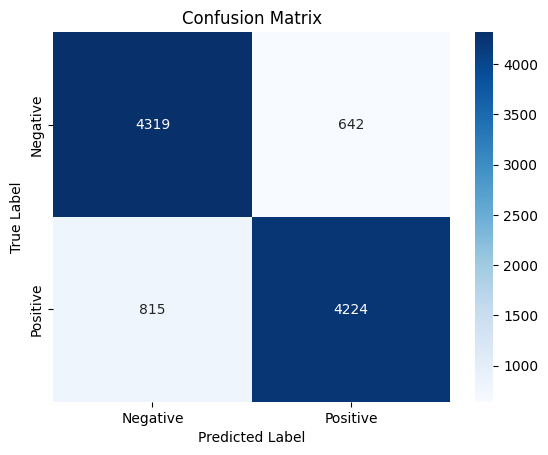

In [11]:
# Step 5: Summarize the performance of the model
# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)
class_report = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")

# Visualize the confusion matrix
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()